In [1]:
cd website

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website


In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import svd, eig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
%matplotlib inline
# Always make it pretty.
plt.style.use('seaborn-talk')
from recommender_model import *
import geopandas as gpd
from shapely.geometry import Point
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../data/df_with_features.csv', index_col=0)
mapping_df = pd.read_csv('../data/mapping_df.csv', index_col=0)

In [4]:
f1 = (0.5, 'Lovely ambiance')
f2 = (0, 'Nice for studying and working')
f3 = (0.2, 'High end coffee')
lat, lng = 47.612133, -122.335908

In [5]:
model = RecommenderModel(df, mapping_df)

In [6]:
recs = model.recommend(f1, f2, f3, lat, lng, r=1).to_dict('records')

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website/recommender_model.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  / normalizing_weight)
/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website/recommender_model.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)


In [7]:
df = model.df

In [8]:
mapped_df = model.mapped_df

In [9]:
cd ..

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter


In [10]:
seattle = gpd.GeoDataFrame.from_file('data/Neighborhoods/WGS84/Neighborhoods.shp')

In [11]:
seattle_points = df[['lng', 'lat']].apply(lambda row: Point(row['lng'], row['lat']), axis=1)
geo_seattle_points = gpd.GeoDataFrame({'geometry':seattle_points,
                                      'names':df['name']})
geo_seattle_points.crs = {'init': 'epsg:4326'}

In [12]:
W = df.drop(['name', 'lat', 'lng', 'address', 'shop_id'], axis=1)
mapping_df_columns = mapping_df.columns
plotting_df = pd.DataFrame(np.dot(W,mapping_df),
                               columns = mapping_df_columns)

In [13]:
land_color = '#B26B32'
dot_color = '#0075B2'

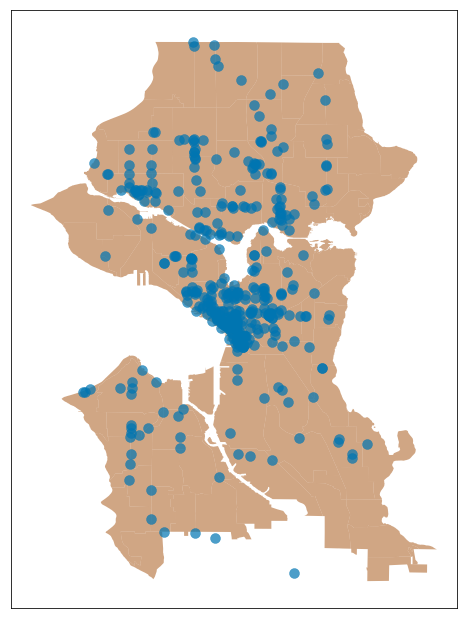

In [14]:
fig, ax = plt.subplots(figsize=(8,11))
seattle.plot(ax=ax, color=land_color, alpha=0.6)
ax.scatter(mapped_df['lng'], mapped_df['lat'], s=100, alpha=0.7, color=dot_color)
ax.set_facecolor('white')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
_=ax.plot()
plt.savefig('images/all_shops_in_seattle.png')

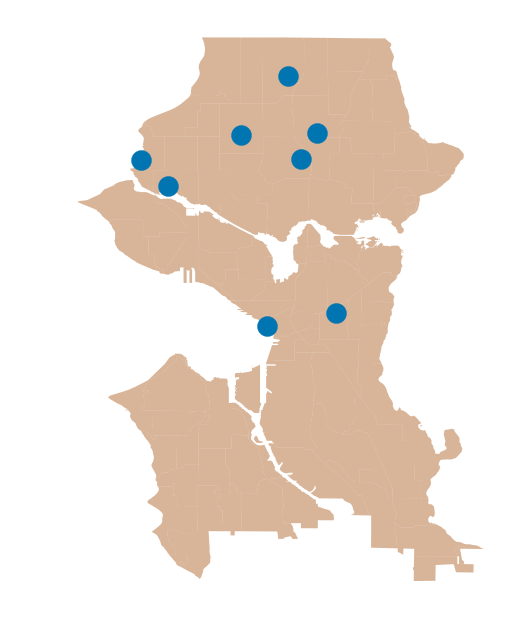

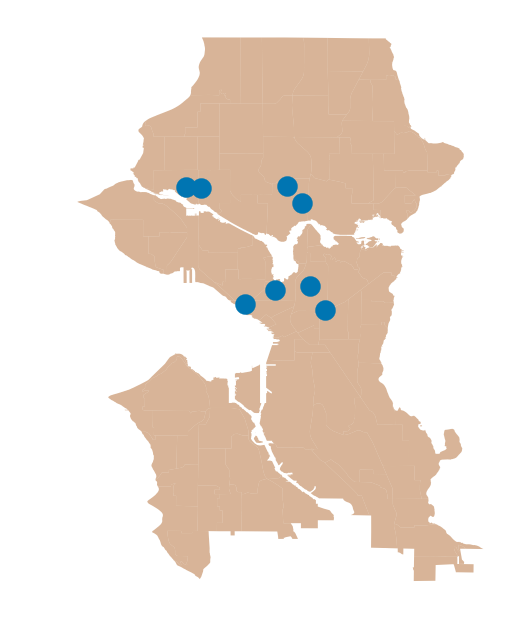

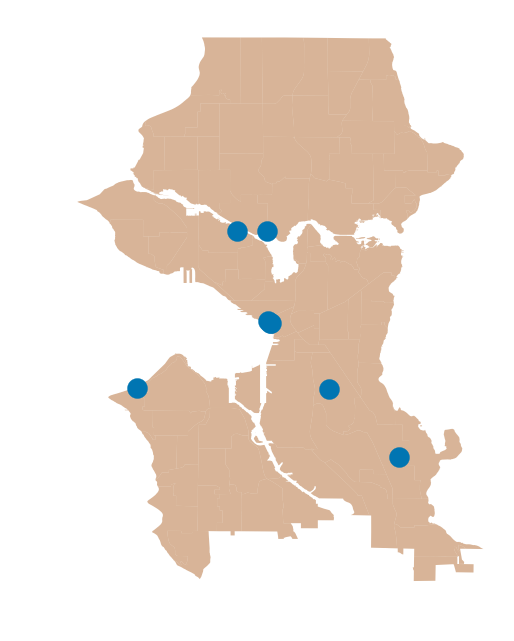

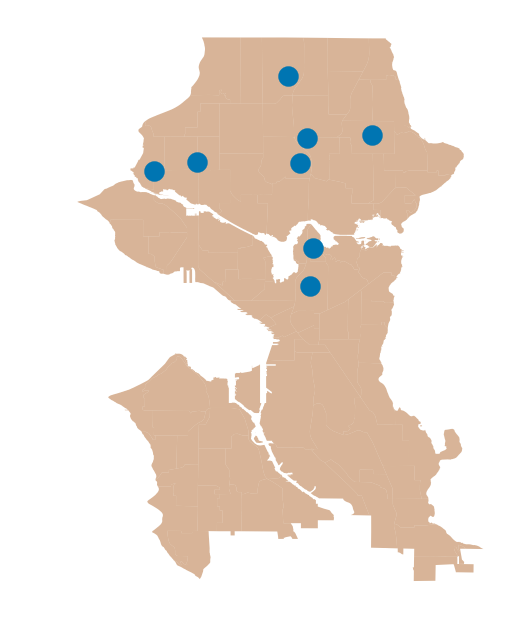

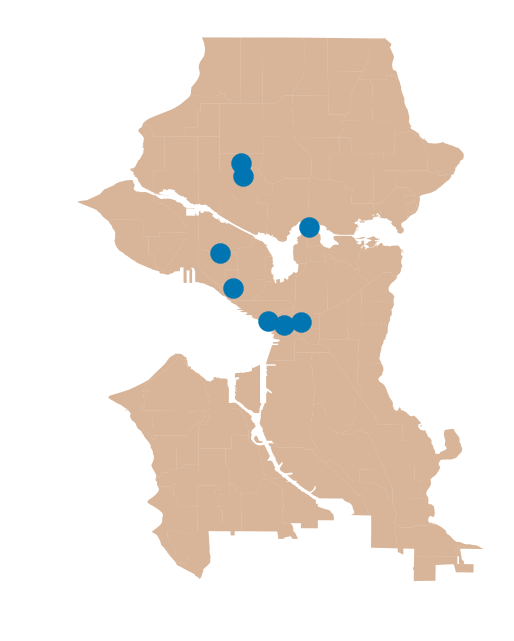

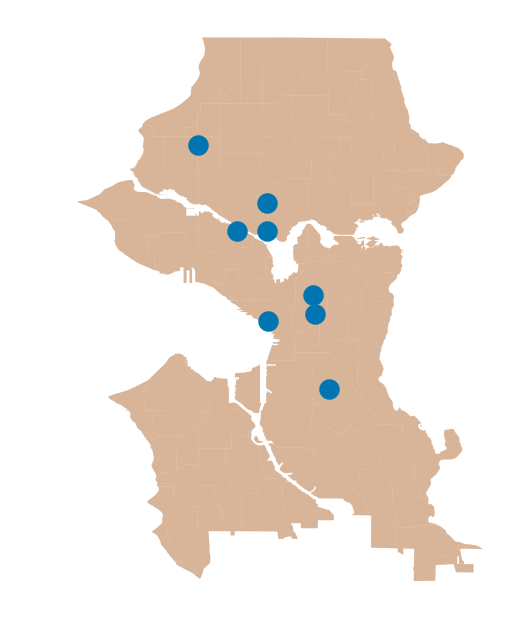

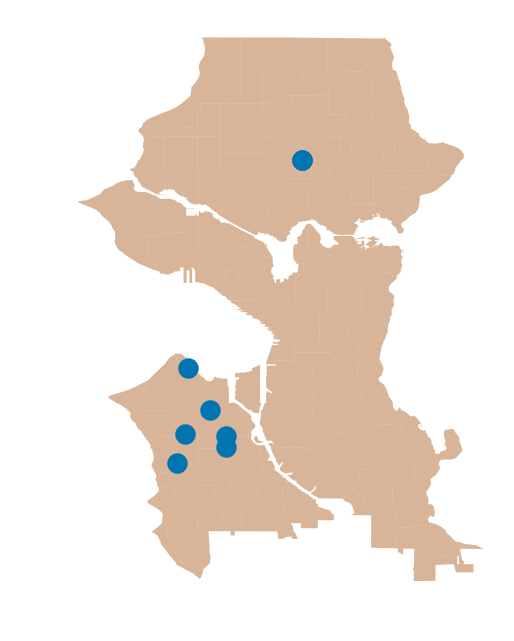

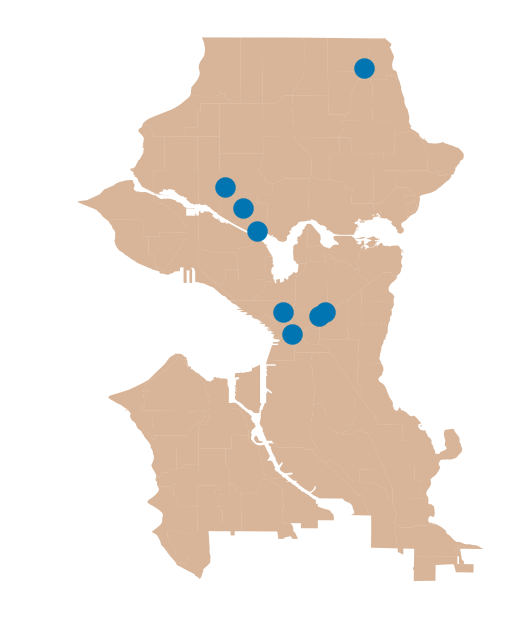

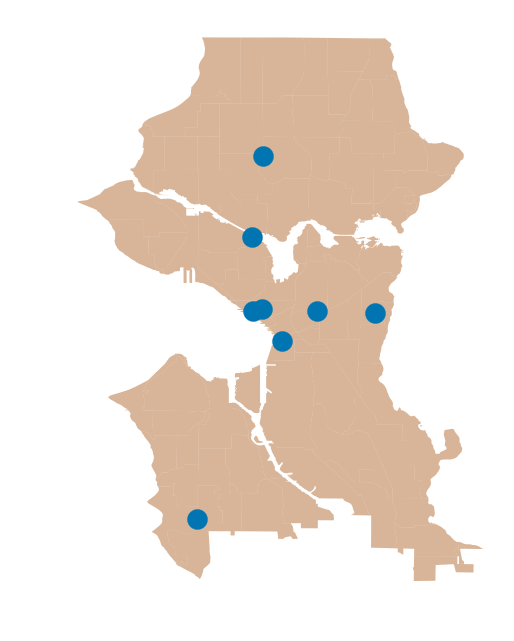

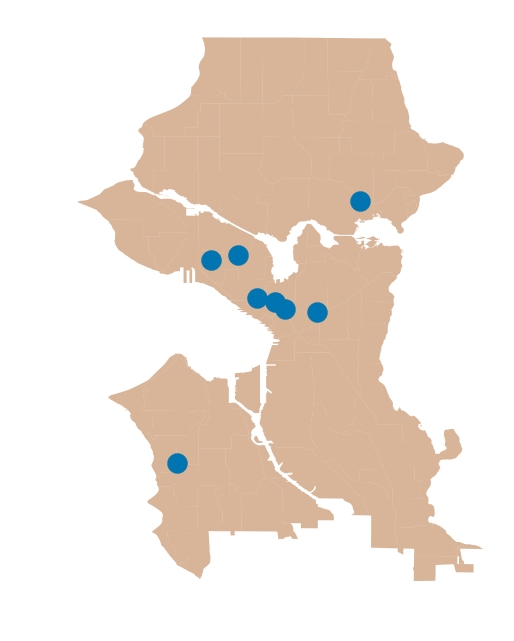

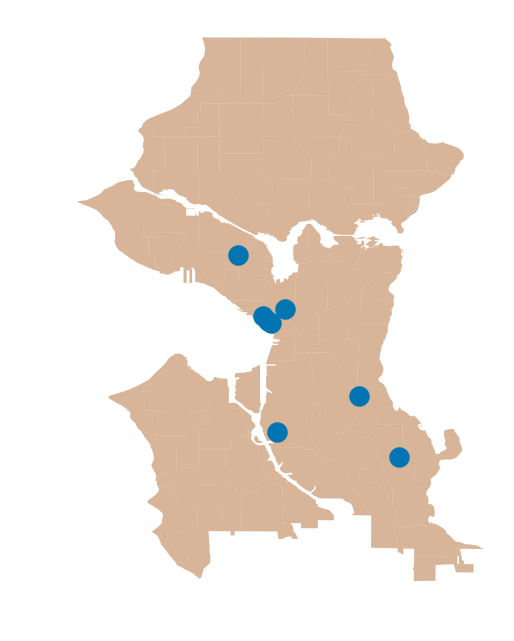

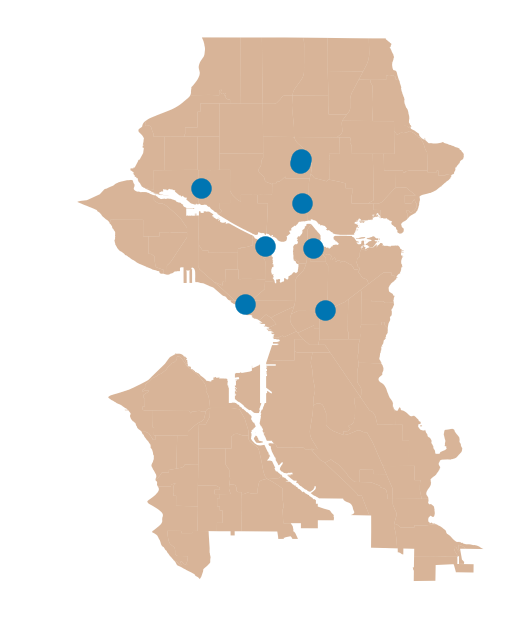

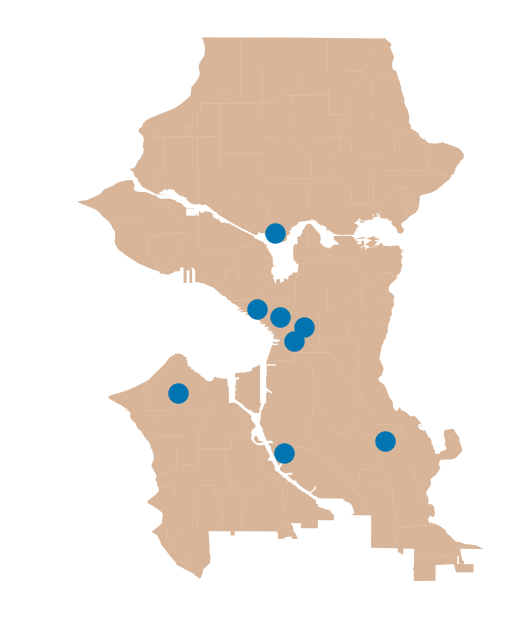

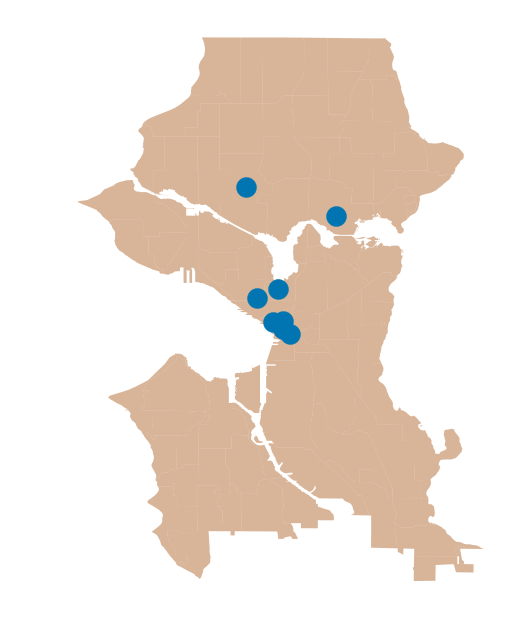

In [27]:
for feature in plotting_df.columns:
    fig, ax = plt.subplots(figsize=(8,11))
    seattle.plot(ax=ax, color=land_color, alpha=0.5)
    perc = 98
    df_over_perc = mapped_df[mapped_df[feature] > np.percentile(mapped_df[feature], perc)]
    ax.scatter(df_over_perc['lng'], df_over_perc['lat'], s=400, alpha=1, color=dot_color)
    ax.set_facecolor('white')
    #ax.set_title(feature)
    ax.axis('off')
    _=ax.plot()
    plt.savefig('images/{}.png'.format(feature))

In [17]:
seattle_shops = gpd.tools.sjoin(geo_seattle_points, seattle, how='right', op='intersects')

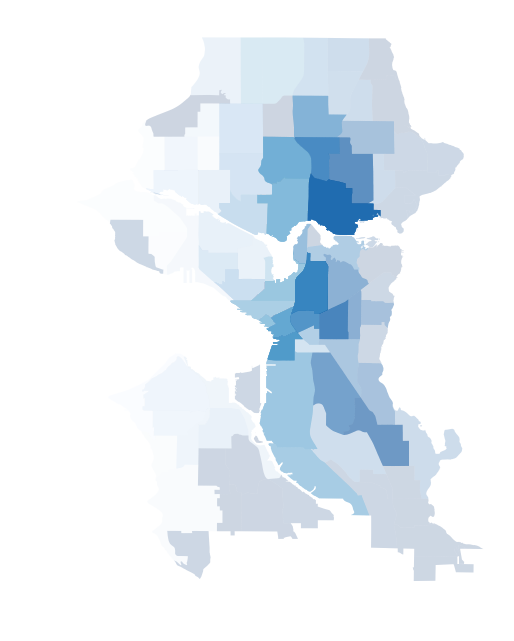

In [26]:
#How caffeinated a neighborhood is
fig, ax = plt.subplots(figsize=(8,11))
seattle_shops.plot(ax=ax, cmap='Blues', alpha=0.2)
ax.set_facecolor('white')
ax.axis('off')
_=ax.plot()
plt.savefig('images/coffee_density.png')


### Playing with PCA

In [28]:
#Features to compare
f1 = 'Fun for families'
f2 = 'Quick in and out'

In [29]:
X = mapped_df[[f1, f2]]

In [30]:
pcd = PCA(2).fit(X.values)
shops_reduced = np.dot(X.values, pcd.components_.T)

In [31]:
shops_reduced.shape

(386, 2)

In [53]:
plotting_df.columns[4]
plotting_df.columns[5]

'Nightlife'

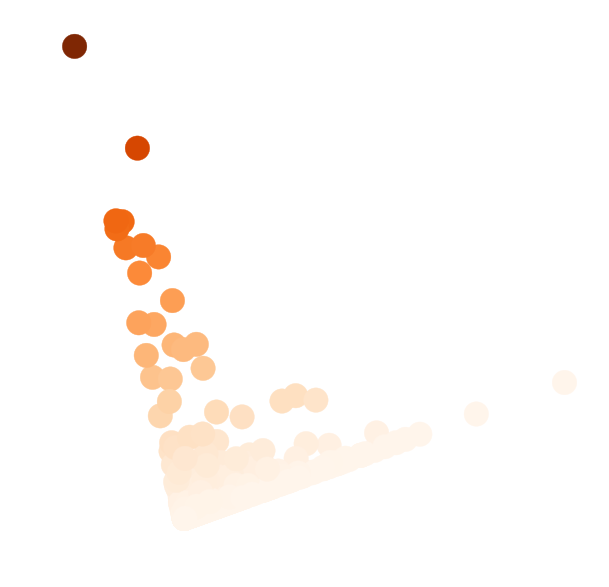

In [123]:
f1 = 'Tasty pastries'
f2 = 'Nightlife'
pcd = PCA(2).fit(X.values)
shops_reduced = np.dot(X.values, pcd.components_.T)
X = mapped_df[[f1, f2]]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(shops_reduced[:, 0], shops_reduced[:, 1], alpha=1, s=600, c=mapped_df[f2], cmap='Oranges')
ax.set_facecolor('white')
ax.axis('off')
_=ax.plot()
plt.savefig('images/pastries_vs_nightlife_SVD.png')

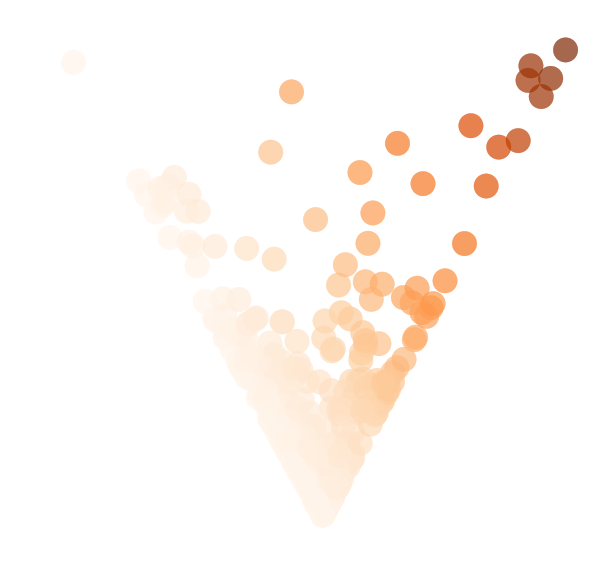

In [121]:
f1 = 'Cozy and comfy'
f2 = 'Lunch and snacks'
pcd = PCA(2).fit(X.values)
shops_reduced = np.dot(X.values, pcd.components_.T)
X = mapped_df[[f1, f2]]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(shops_reduced[:, 0], shops_reduced[:, 1], alpha=0.7, s=600, c=mapped_df[f2], cmap='Oranges')
ax.set_facecolor('white')
ax.axis('off')
_=ax.plot()
plt.savefig('images/cozy_vs_snack_SVD.png')

In [97]:
# for feature1 in plotting_df.columns:
#     f1 = feature1
#     f2 = plotting_df.columns[13]
#     pcd = PCA(2).fit(X.values)
#     shops_reduced = np.dot(X.values, pcd.components_.T)
#     X = mapped_df[[f1, f2]]
#     fig, ax = plt.subplots(figsize=(4,4))
#     ax.scatter(shops_reduced[:, 0], shops_reduced[:, 1], alpha=1, c=mapped_df[f1], cmap='Reds')
#     ax.set_facecolor('white')
#     # ax.get_xaxis().set_ticks([])
#     # ax.get_yaxis().set_ticks([])
#     _=ax.plot()